In [2]:
import pandas as pd
from matplotlib  import pyplot as plt
import seaborn as sns

import re
import datetime as dt

import matplotlib.pyplot as plot

from mlxtend.frequent_patterns import apriori, association_rules

import numpy as np

import warnings
warnings.filterwarnings('ignore')


# Helper Functions

In [3]:
def hot_encode(x):
    '''
    function to apply one hot encoding

    Args:
        x{int}: input value to be encoded

    Returns:
        {int}: 0 if x less than or equals 0, and 1 if x is greater than or equals 1

    '''
    if(x<=0):
        return 0
    if(x>=1):
        return 1

In [4]:
def plot_sum(df,group,column,plot,title="",yLabel="",xLabel=""):
    '''
    function to plot the sum of a column for a choosing group of a given data

    Args:
        df{dataframe}: representing the data to be visualize
        group{list of strings}: represent columns to group the data by
        column{string}: represents the column to be summed
        plot{string}: represents the type of the plot (eg.bar)
        title{string}: title of the plot
        yLabel{string}: label of the y axis
        xLabel{string}: label of the x axis

    output:
        shows a plot

    '''
    ax=plt.figure(figsize=(12,5))
    plt.title(title)
    plt.ylabel(yLabel)
    df.groupby(group)[column].sum().sort_values().plot(kind=plot)
    plt.xlabel(xLabel)
    plt.xticks(rotation=85)

    plt.show()


In [5]:
def plot_count(df,group,column,plot,title="",yLabel="",xLabel=""):
    '''
    function to plot the count of a column for a choosing group of a given data

    Args:
        df{dataframe}: representing the data to be visualize
        group{list of strings}: represent columns to group the data by
        column{string}: represents the column to be counted
        plot{string}: represents the tupe of the plot (eg.bar)
        title{string}: title of the plot
        yLabel{string}: label of the y axis
        xLabel{string}: label of the x axis

    output:
        shows a plot

    '''
    ax=plt.figure(figsize=(12,5))
    plt.title(title)
    plt.ylabel(yLabel)
    df.groupby(group)[column].count().sort_values().plot(kind=plot)
    plt.xlabel(xLabel)
    plt.xticks(rotation=85)
    plt.show()



In [6]:
def pie_plot(df,column,title="",FIG_SIZE=(10,5)):
    '''
    function to create pie chart of a column for a choosing group of a given data

    Args:
        df{dataframe}: representing the data to be visualize
        group{list of strings}: represent columns to group the data by
        column{string}: represents the column to be summed
        title{string}: title of the plot
        yLabel{string}: label of the y axis
        xLabel{string}: label of the x axis

    output:
        shows a pie chart

    '''
    fig1, ax1 = plt.subplots(figsize=FIG_SIZE)
    plt.pie(df.groupby(column)[column].count(),labels=\
            df.groupby(column)[column].count().index, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title(title)
    ax1.axis('equal')
    plt.tight_layout()
    plt.show()

In [7]:
#function to plot columns
def plot_mean(df,group,column,plot,title="",yLabel="",xLabel=""):
    '''
    function to plot the average of a column for a choosing group of a given data

    Args:
        df{dataframe}: representing the data to be visualize
        group{list of strings}: represent columns to group the data by
        column{string}: represents the column to be averaged
        title{string}: title of the plot
        yLabel{string}: label of the y axis
        xLabel{string}: label of the x axis

    output:
        shows a plot

    '''
    ax=plt.figure(figsize=(12,5))
    plt.title(title)
    plt.ylabel(yLabel)
    df.groupby(group)[column].mean().sort_values().plot(kind=plot)
    plt.xlabel(xLabel)
    plt.xticks(rotation=85)
    plt.show()

In [8]:
def sns_count_plot(df,column,title=""):

    '''
    function to plot the count of a column for a given data using seaborn count plot

    Args:
        df{dataframe}: representing the data to be visualize
        column{string}: represents the column to be counted and visualize
        title{string}: title of the plot

    output:
        shows a count seaborn plot

    '''
    fig1, ax1 = plt.subplots(figsize=(12,10))
    plt.title(title)
    sns.countplot(data=df,x=column,order = df[column].value_counts().index)
    plt.xticks(rotation=95)
    plt.show()

#  Transaction data

## Reading and Exploration




In [9]:
transactionData=pd.read_excel('QVI_transaction_data.xlsx')

In [10]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [11]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


* LYLTY_CARD_NBR: loyality card number to identify customers
* TXN_ID: an identifier for transactions
* PROD_NBR: identifier for products
* PROD_QTY: quantity of purchased product by a customer in a transaction
* TOT_SALES: the price of products bought based on the quantity(unit price * quantity)
* DATE: date of transaction
* STORE_NBR: identifier for the store in which a transaction has been made
* PROD_NAME: name of the product

### check nulls

In [12]:
transactionData.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

### Check Duplicates

In [13]:
transactionData.duplicated().any()

True

In [14]:
transactionData.drop_duplicates(inplace=True)

In [15]:
transactionData.duplicated().any()

False

## Feature Engineering

### handling product name feature

In [16]:
transactionData['PROD_NAME'].describe()

count                                     264835
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [17]:
transactionData['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [18]:
#function to clean products name
def clean_prod_name(text):


    #converting text to lower case
    text=text.lower()

    #removing words with special characters
    text=re.sub(r'[a-zA-Z]*[^0-9a-zA-Z\s][a-zA-Z]*',' ',text)

    #removing words with digits
    text=re.sub(r'[0-9]+[a-zA-Z]*',' ',text)


    #removing extra spaces
    text=re.sub(r"(  )+|^\s+|\s+$",'',text)



    return text

In [19]:
transactionData['PROD_NAME_CLN']=transactionData['PROD_NAME'].apply(clean_prod_name)

In [20]:
transactionData['PROD_NAME_CLN'].nunique()

112

In [21]:
#transactionData['count']=transactionData.groupby('PROD_NAME_CLN')['PROD_NAME_CLN'].transform('count')
#transactionData.sort_values('count', inplace=True, ascending=False)

In [22]:
#transactionData=transactionData.drop('count', axis=1)
#transactionData.reset_index(inplace=True)
#transactionData.head()


In [23]:
transactionData['PROD_NAME_CLN'].unique()

array(['natural chipcompny seasalt', 'ccs nacho cheese',
       'smiths crinkle cutchips chicken', 'smiths chip thinly',
       'kettle tortilla chili', 'old el paso salsa dip tomato mild',
       'smiths crinkle chips salt vinegar', 'grain waves sweet chilli',
       'doritos corn chip mexican jalapeno', 'grain waves sour',
       'kettle sensations siracha lime', 'twisties cheese',
       'ww crinkle cutchicken', 'thins chipstangy', 'ccs original',
       'burger rings', 'ncc sour creamgarden chives',
       'doritos corn chip southern chicken', 'cheezels cheese box',
       'smiths crinkleoriginal', 'infzns crn crnchers tangy gcamole',
       'kettle sea salt and vinegar', 'smiths chip thinlycut original',
       'kettle original', 'red rock deli thai',
       'pringles sthrn friedchicken', 'pringles bbq',
       'red rock deli srsalsa mzzrlla', 'thins chips originl saltd',
       'red rock deli spsalt truffle', 'smiths thinly swt',
       'kettle chilli', 'doritos mexicana',
      

#### remove non_chips products

In [24]:
patternDel =transactionData['PROD_NAME_CLN'].str.contains("salsa")
transactionData=transactionData[~patternDel]


In [25]:
transactionData.shape

(246741, 9)

#### extract pack size from product name

In [26]:
transactionData['PACK_SIZE']= transactionData['PROD_NAME'].apply(lambda x: int(re.findall(r'\d+',x)[0]))

In [27]:
transactionData['PACK_SIZE'].sort_values()

132292     70
198958     70
63671      70
233503     70
72444      70
         ... 
219168    380
158987    380
82055     380
82311     380
114597    380
Name: PACK_SIZE, Length: 246741, dtype: int64

#### extract brand name from product name

In [28]:
transactionData['BRAND']= transactionData['PROD_NAME_CLN'].apply(lambda x: x.split()[0])

In [29]:
transactionData['BRAND'].unique()

array(['natural', 'ccs', 'smiths', 'kettle', 'grain', 'doritos',
       'twisties', 'ww', 'thins', 'burger', 'ncc', 'cheezels', 'infzns',
       'red', 'pringles', 'dorito', 'infuzions', 'smith', 'grnwves',
       'tyrrells', 'cobs', 'french', 'rrd', 'tostitos', 'cheetos',
       'woolworths', 'snbts', 'sunbites'], dtype=object)

#### unify brands names

In [30]:
brandNames={"red":"Red Rock Deli",
 "rrd":"Red Rock Deli",
"infzns":"infuzions",
'snbts':'sunbites',
 'ww':'woolworths',
 'smith':'smiths',
 'grain':'grain waves',
 'grnwves':'grain waves',
 'burger':'burger rings',
 'french':"thins",
 'ncc':'the natural chip co',
 'natural':'the natural chip co',
  'dorito': 'doritos'
}


In [31]:
transactionData['BRAND']=transactionData['BRAND'].replace(brandNames)

In [32]:
transactionData['BRAND'].unique()

array(['the natural chip co', 'ccs', 'smiths', 'kettle', 'grain waves',
       'doritos', 'twisties', 'woolworths', 'thins', 'burger rings',
       'cheezels', 'infuzions', 'Red Rock Deli', 'pringles', 'tyrrells',
       'cobs', 'tostitos', 'cheetos', 'sunbites'], dtype=object)

### handling date feature

In [33]:
#convert date from excel format to date time format
transactionData['DATE']=pd.TimedeltaIndex(transactionData['DATE'], unit='d') + dt.datetime(1899, 12, 30)

In [34]:
transactionData['DATE'].value_counts()

2018-12-24    865
2018-12-23    853
2018-12-22    840
2018-12-19    839
2018-12-20    808
             ... 
2019-06-24    612
2018-10-18    611
2018-11-25    610
2018-09-22    609
2019-06-13    607
Name: DATE, Length: 364, dtype: int64

note: we only have 364 days in our data, there's a missing day

In [35]:
#removes time from date since it's unavailable
transactionData['DATE']=transactionData['DATE'].dt.to_period('d')

In [36]:
#extract month from date for visualization purposes
transactionData['DATE_MON']=transactionData['DATE'].dt.month

In [37]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_CLN,PACK_SIZE,BRAND,DATE_MON
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,natural chipcompny seasalt,175,the natural chip co,10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,ccs nacho cheese,175,ccs,5
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,smiths crinkle cutchips chicken,170,smiths,5
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,smiths chip thinly,175,smiths,8
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,kettle tortilla chili,150,kettle,8


In [38]:
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,DATE_MON
count,246741.000000,2.467410e+05,2.467410e+05,246741.000000,246741.000000,246741.000000,246741.000000,246741.000000
mean,135.051212,1.355311e+05,1.351312e+05,56.351835,1.908061,7.321328,175.585180,6.534958
std,76.787231,8.071542e+04,7.814786e+04,33.695488,0.659832,3.077833,59.434847,3.447867
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000,1.000000
25%,70.000000,7.001500e+04,6.756900e+04,26.000000,2.000000,5.800000,150.000000,4.000000
50%,130.000000,1.303670e+05,1.351840e+05,53.000000,2.000000,7.400000,170.000000,7.000000
75%,203.000000,2.030840e+05,2.026540e+05,87.000000,2.000000,8.800000,175.000000,10.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000,12.000000


### check transaction data for outliers

In [39]:
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,DATE_MON
count,246741.000000,2.467410e+05,2.467410e+05,246741.000000,246741.000000,246741.000000,246741.000000,246741.000000
mean,135.051212,1.355311e+05,1.351312e+05,56.351835,1.908061,7.321328,175.585180,6.534958
std,76.787231,8.071542e+04,7.814786e+04,33.695488,0.659832,3.077833,59.434847,3.447867
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000,1.000000
25%,70.000000,7.001500e+04,6.756900e+04,26.000000,2.000000,5.800000,150.000000,4.000000
50%,130.000000,1.303670e+05,1.351840e+05,53.000000,2.000000,7.400000,170.000000,7.000000
75%,203.000000,2.030840e+05,2.026540e+05,87.000000,2.000000,8.800000,175.000000,10.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000,12.000000


notes: product quantity and total sales have outliers (max value is much bigger than the mean value)

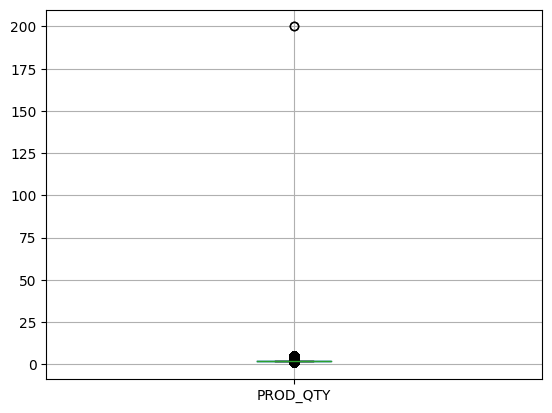

In [40]:
#box plot to check outliers
b_plot = transactionData.boxplot(column = 'PROD_QTY')
b_plot.plot()
plot.show()

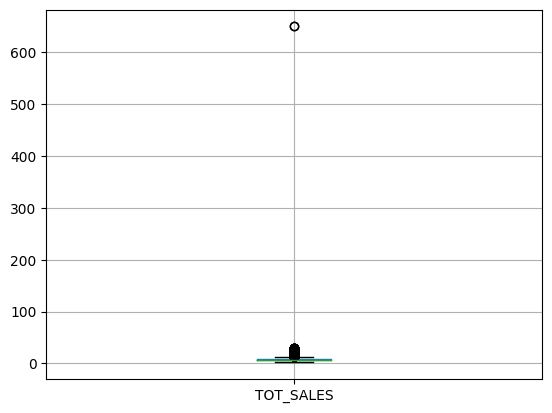

In [41]:
b_plot = transactionData.boxplot(column = 'TOT_SALES')
b_plot.plot()
plot.show()

notes: from the box plot we can see that most of our values are under 50 in total sales and under 25 in product quantity

In [42]:
transactionData[(transactionData['PROD_QTY']>25) | (transactionData['TOT_SALES']>50)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_CLN,PACK_SIZE,BRAND,DATE_MON
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,dorito corn chp supreme,380,doritos,8
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,dorito corn chp supreme,380,doritos,5


note: both of our transaction data outliers come from the same customer

In [43]:
transactionData[transactionData['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_CLN,PACK_SIZE,BRAND,DATE_MON
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,dorito corn chp supreme,380,doritos,8
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,dorito corn chp supreme,380,doritos,5


notes: cutomer had only these two outliers transaction in data over the year and, he's not a regular customer (sus)


In [44]:
#remove cutomer's loyality card from data
transactionData=transactionData[~(transactionData['LYLTY_CARD_NBR']==226000)]

## Data Visualiztion

### Date analysis

In [45]:
transactionData.groupby('DATE_MON')['TOT_SALES'].sum()

DATE_MON
1     151593.80
2     140480.00
3     155772.80
4     149374.20
5     146300.35
6     150135.90
7     154514.50
8     147422.05
9     150058.90
10    153448.10
11    149609.50
12    156461.60
Name: TOT_SALES, dtype: float64

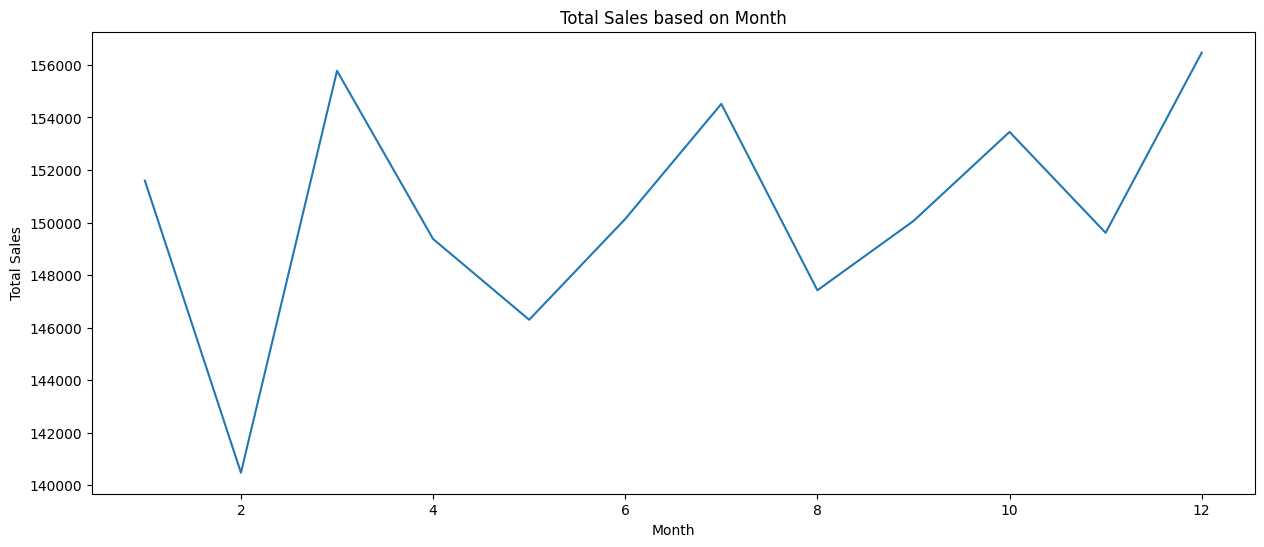

In [46]:
plt.figure(figsize=(15,6))
plt.title('Total Sales based on Month')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],transactionData.groupby('DATE_MON')['TOT_SALES'].sum())
plt.show()

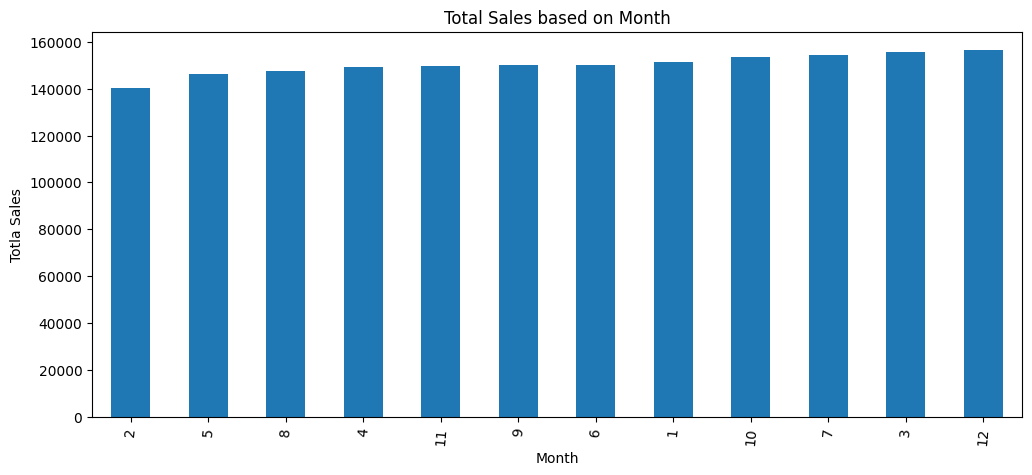

In [47]:
plot_sum(transactionData,'DATE_MON','TOT_SALES','bar','Total Sales based on Month','Totla Sales','Month')
#plt.plot(transactionData.DATE_MON.unique(),transactionData.groupby('DATE_MON')['TOT_SALES'].count())

notes: december has the highest sales of all months

#### examing sales for December

In [48]:
#get december data
transactionDataDec=transactionData[transactionData['DATE_MON'].astype(str)=='12']

In [49]:
#get data for every day in december for visualization purposes
transactionDataDec['DATE_DAY']=transactionDataDec['DATE'].dt.day

In [50]:
transactionDataDec['DATE_DAY']

224       14
232       17
265       12
284        2
285       24
          ..
264751    20
264775     1
264788    18
264812    16
264834    27
Name: DATE_DAY, Length: 21225, dtype: int64

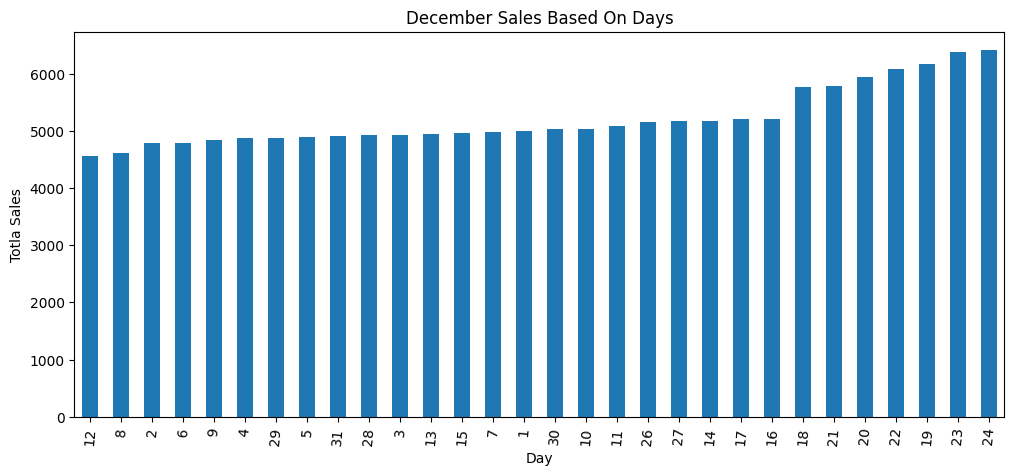

In [51]:
#show summation of total sales for every day on december
plot_sum(transactionDataDec,'DATE_DAY','TOT_SALES','bar','December Sales Based On Days','Totla Sales','Day')


Insights:

*   highest sales rate is on 24 and 23 of december (two days before the christmas holiday)

*  there's no sales on 25 (christmas day, store is closed)

Recommendations:


*   provide offers on expensive/new products during Holiday season for customer attraction






### Pack Size analysis

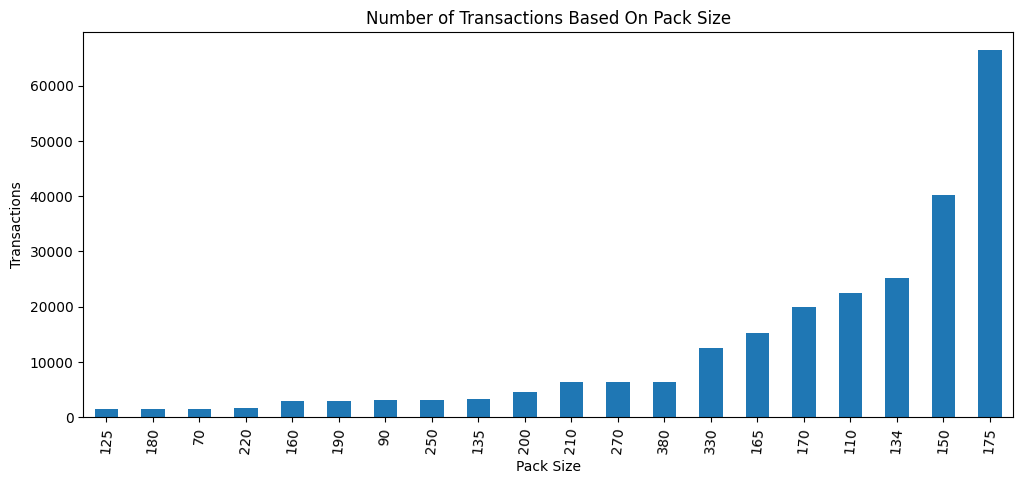

In [52]:
plot_count(transactionData,'PACK_SIZE','PACK_SIZE','bar','Number of Transactions Based On Pack Size','Transactions','Pack Size')


insights:



*   products of size 150g is the best seller
*   products of size 125g, 180g, 70g, 220g have the least number of transactions

recommendations:


*   increase availability of the best seller Pack Size in storage
*   ask for more data to check if the availability of the least selling pack sizes in stores to determine whether it's beacause their lack of availability or customers really don't prefer them










# Customer Data

## Reading and Exploration

In [53]:
customerData=pd.read_csv('QVI_purchase_behaviour.csv')

In [54]:
customerData.shape

(72637, 3)

In [55]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


* LYLTY_CARD_NBR: loyality card number to identify customers
* LIFESTAGE: identifies whether a customer has a family or not and what point in life they are at
* PREMIUM_CUSTOMER: Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy


In [56]:
customerData['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [57]:
customerData['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

## Data Visualizatin

### Customer Group Analysis

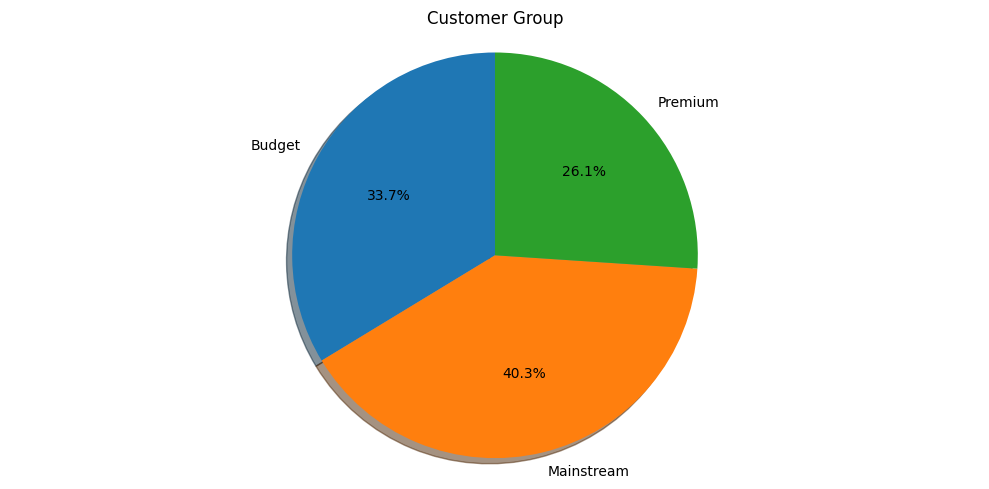

In [58]:
pie_plot(customerData,'PREMIUM_CUSTOMER','Customer Group')

insights:
*   Mainstream is the dominant customer group

recommendations:


*   choose Mainstream segment to be the target for a marketing campaign






### Customer Lifestage Analysis

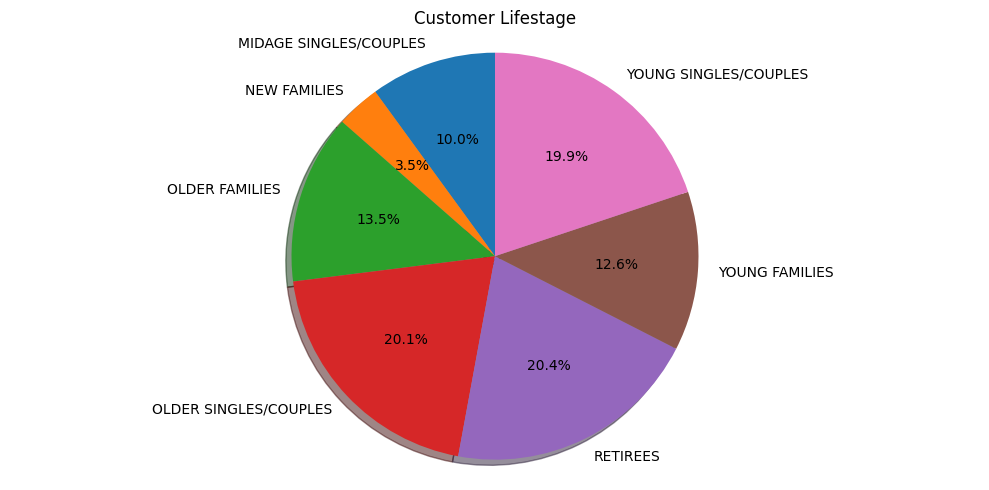

In [59]:
pie_plot(customerData,'LIFESTAGE','Customer Lifestage')

insights:


*   most of our costomers come from the older singles/couples, older singles/couples and retirees with a percentage around 20%



#Final Data

## Data Preparing

In [60]:
customerData.shape

(72637, 3)

In [61]:
transactionData.shape

(246739, 12)

### merging customer data with transaction data

In [62]:
data=pd.merge(transactionData, customerData, on='LYLTY_CARD_NBR',  how='left')

In [63]:
data.shape

(246739, 14)

### checking for nulls

In [64]:
data.isna().any()

DATE                False
STORE_NBR           False
LYLTY_CARD_NBR      False
TXN_ID              False
PROD_NBR            False
PROD_NAME           False
PROD_QTY            False
TOT_SALES           False
PROD_NAME_CLN       False
PACK_SIZE           False
BRAND               False
DATE_MON            False
LIFESTAGE           False
PREMIUM_CUSTOMER    False
dtype: bool

In [65]:
data.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PROD_NAME_CLN', 'PACK_SIZE',
       'BRAND', 'DATE_MON', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

## Feature Enginnering

In [66]:
data['UNIT_PRICE']=data['TOT_SALES']/data['PROD_QTY']

In [67]:
data['PRICE_RANGE']=pd.cut(data['UNIT_PRICE'], 3, labels=['low', 'average', 'high'])

In [68]:
data.to_csv("data.csv",index=False)

## Data Visualization

### total sales based on customer lifestage and purchasing behaviour

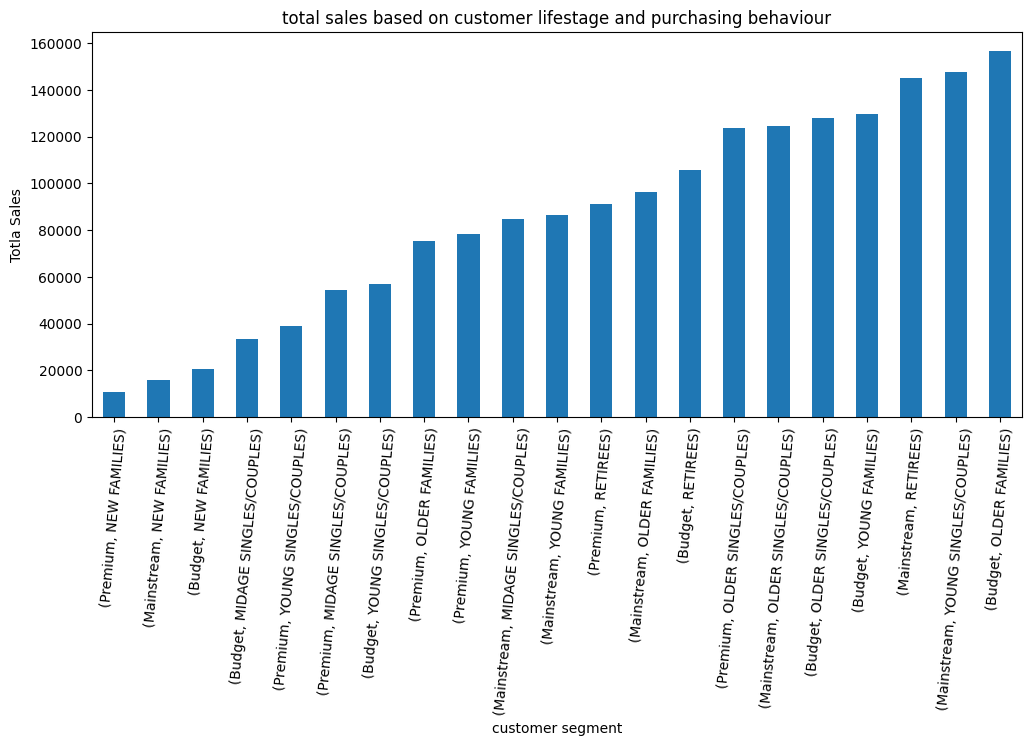

In [69]:
plot_sum(data,['PREMIUM_CUSTOMER','LIFESTAGE'],'TOT_SALES','bar','total sales based on customer lifestage and purchasing behaviour','Totla Sales','customer segment')


insights:


*   Sales are coming mainly from (Budget, older families), (Mainstream, young
singles/couples), and (Mainstream , retirees)




### number of customers in each segment

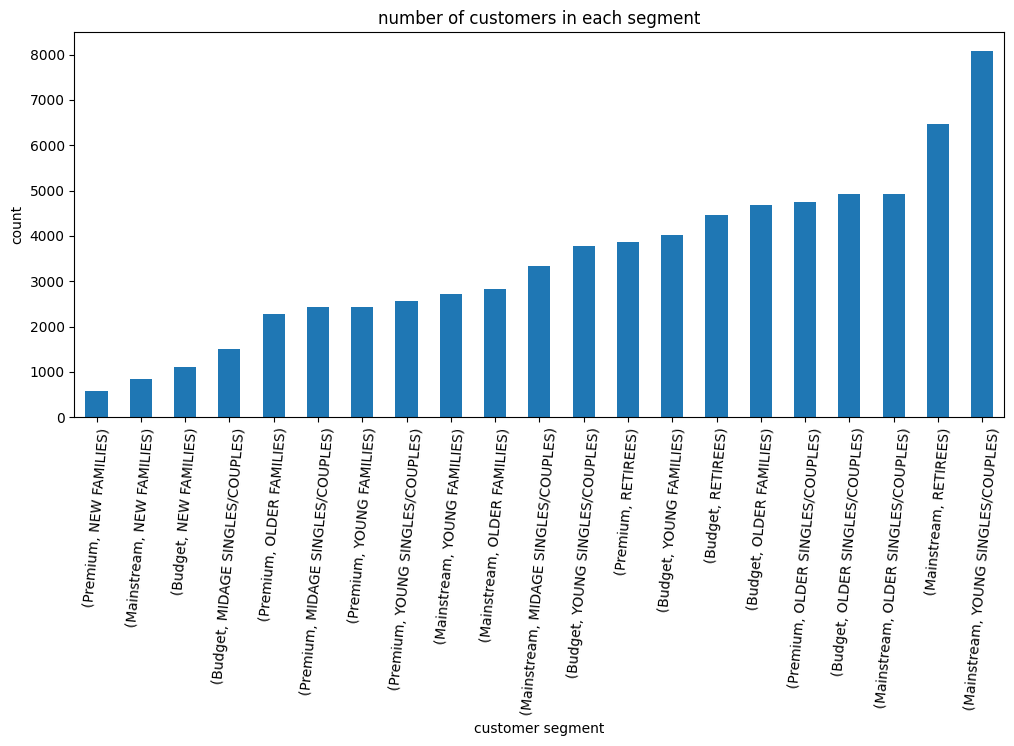

In [70]:
plot_count(customerData,['PREMIUM_CUSTOMER','LIFESTAGE'],'LIFESTAGE','bar','number of customers in each segment','count','customer segment')


 insights:

*  (Mainstream, young singles/couples), and (Mainstream , retirees) have more customers which contribute in them having high sales rate
*   (Budget, older families) on the other hand, has much less customers!



### average of product units for each segment




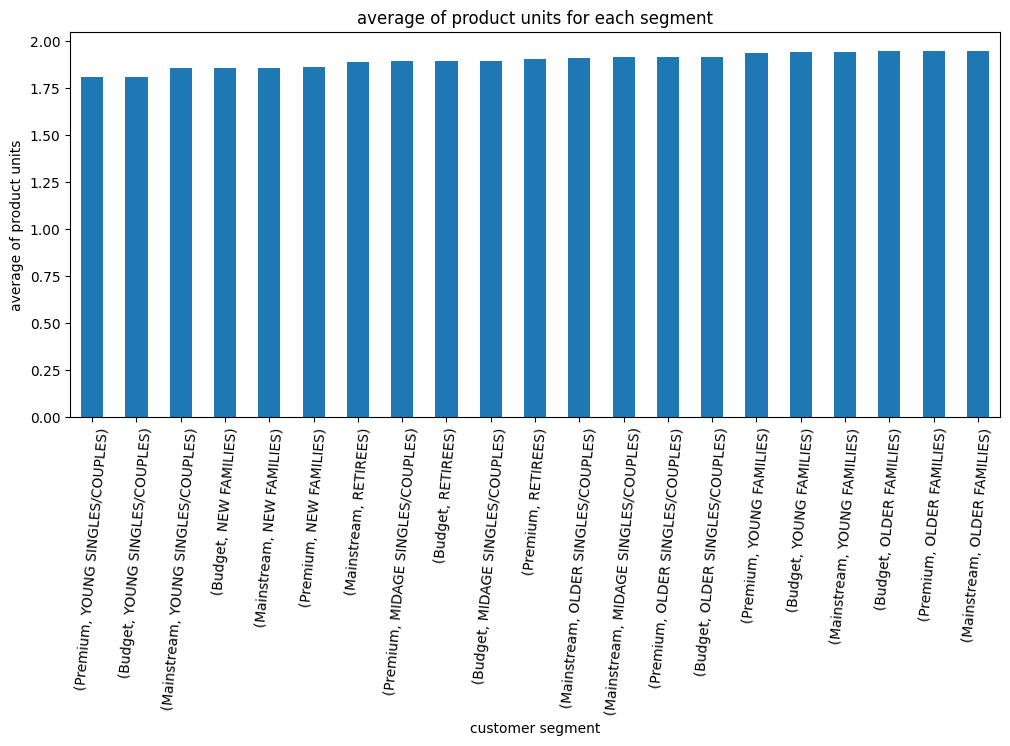

In [71]:
plot_mean(data,['PREMIUM_CUSTOMER','LIFESTAGE'],'PROD_QTY','bar','average of product units for each segment','average of product units','customer segment')


insights:


*   Older families and young families buy more chips per customer





### average of unit price for each customer segment

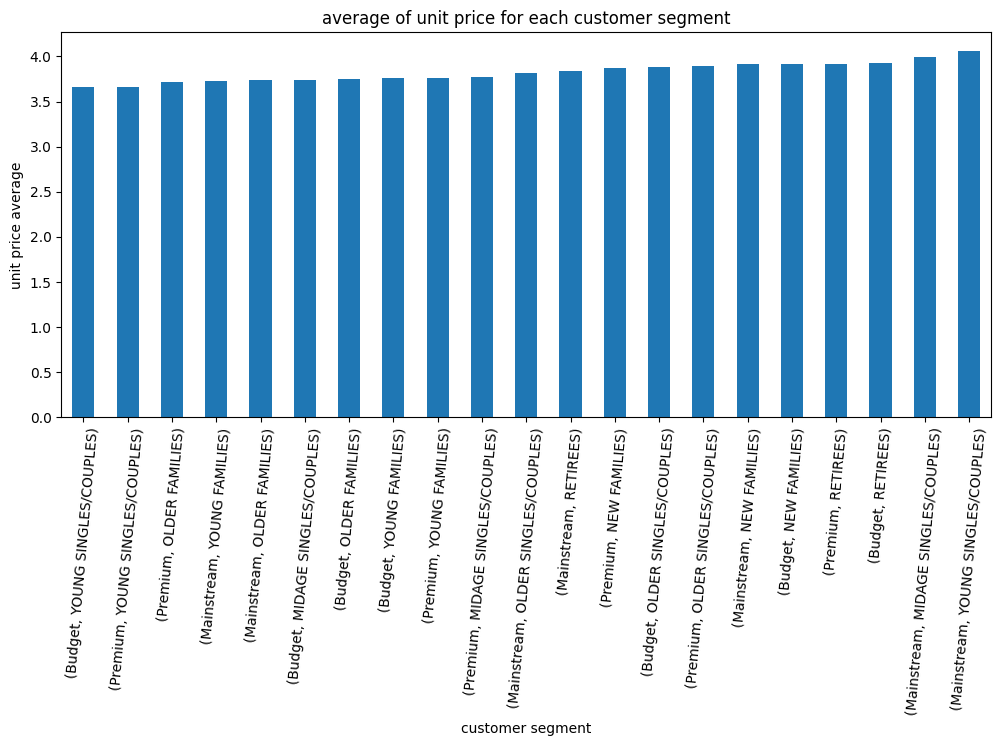

In [72]:
plot_mean(data,['PREMIUM_CUSTOMER','LIFESTAGE'],'UNIT_PRICE','bar','average of unit price for each customer segment','unit price average','customer segment')


insights:

*   Mainstream midage and young singles and couples are more willing to pay more per packet of chips


###  Investigation for Interesting segments

In [73]:
mainstreamYngData=data[(data['PREMIUM_CUSTOMER']=='Mainstream') &( data['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]

#### Pack Size

In [74]:
#check pack size correlation with price
data['PACK_SIZE'].corr(data['UNIT_PRICE'])

0.5071935894353186

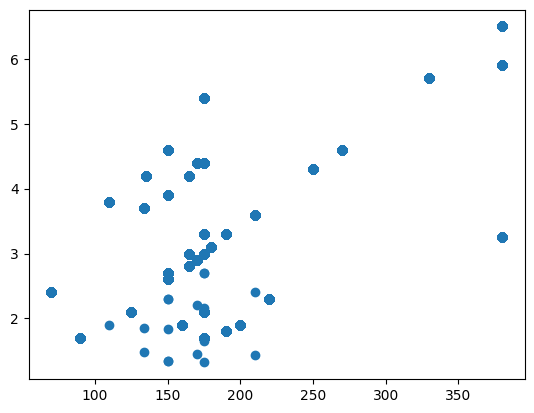

In [75]:
plt.scatter(data['PACK_SIZE'],data['UNIT_PRICE'])

there's a correlation between pack size and price

##### Mainstream YOUNG SINGLES/COUPLES and preferred Pack Size



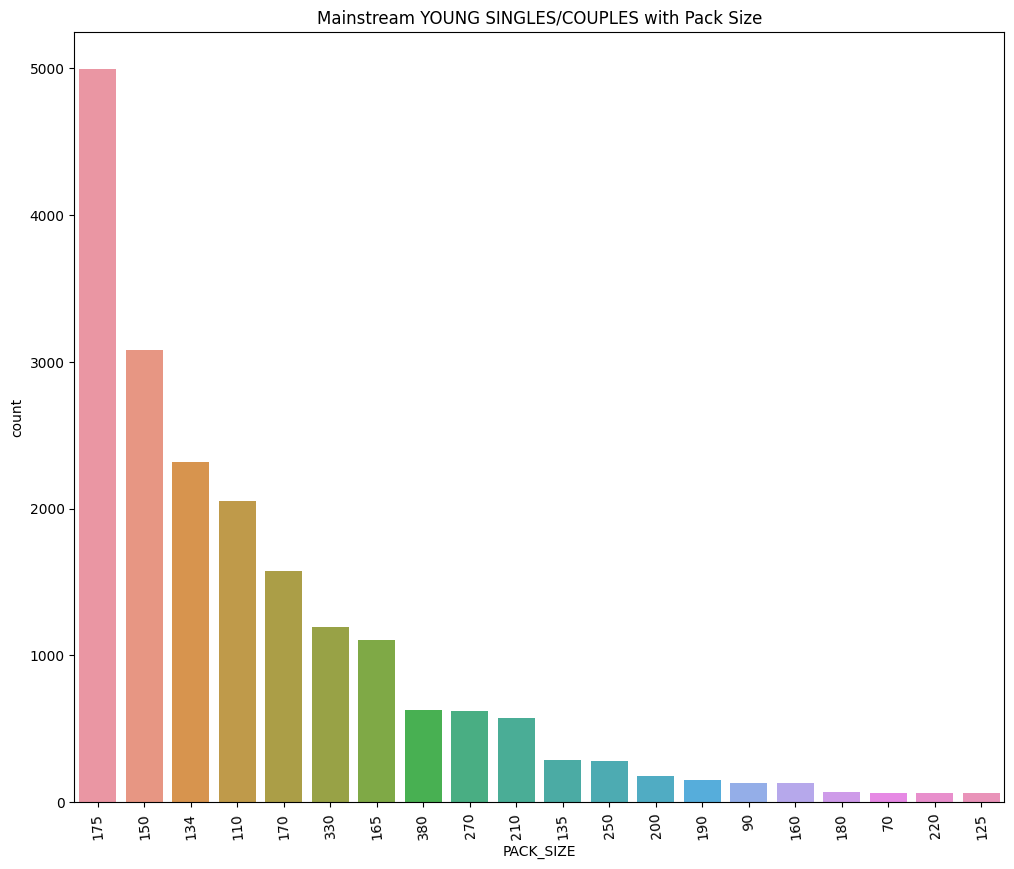

In [76]:
sns_count_plot(mainstreamYngData,'PACK_SIZE',title='Mainstream YOUNG SINGLES/COUPLES with Pack Size')

##### Budget Old Families and preferred Pack Size


In [77]:
BudgetOldFamData=data[(data['PREMIUM_CUSTOMER']=='Budget') &( data['LIFESTAGE']=='OLDER FAMILIES')]


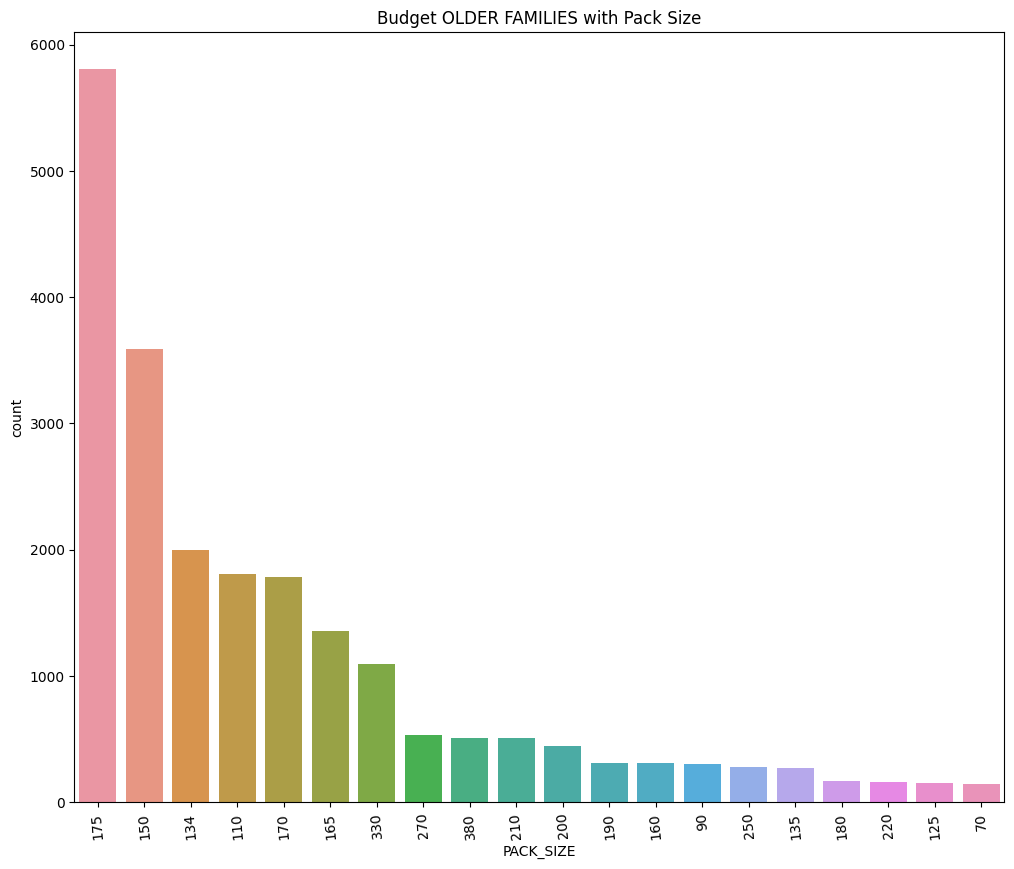

In [78]:
sns_count_plot(BudgetOldFamData,'PACK_SIZE',title='Budget OLDER FAMILIES with Pack Size')

##### Mainstream Retirees and preferred Pack Size


In [79]:
mainstreamRetireesData=data[(data['PREMIUM_CUSTOMER']=='Mainstream') &( data['LIFESTAGE']=='RETIREES')]

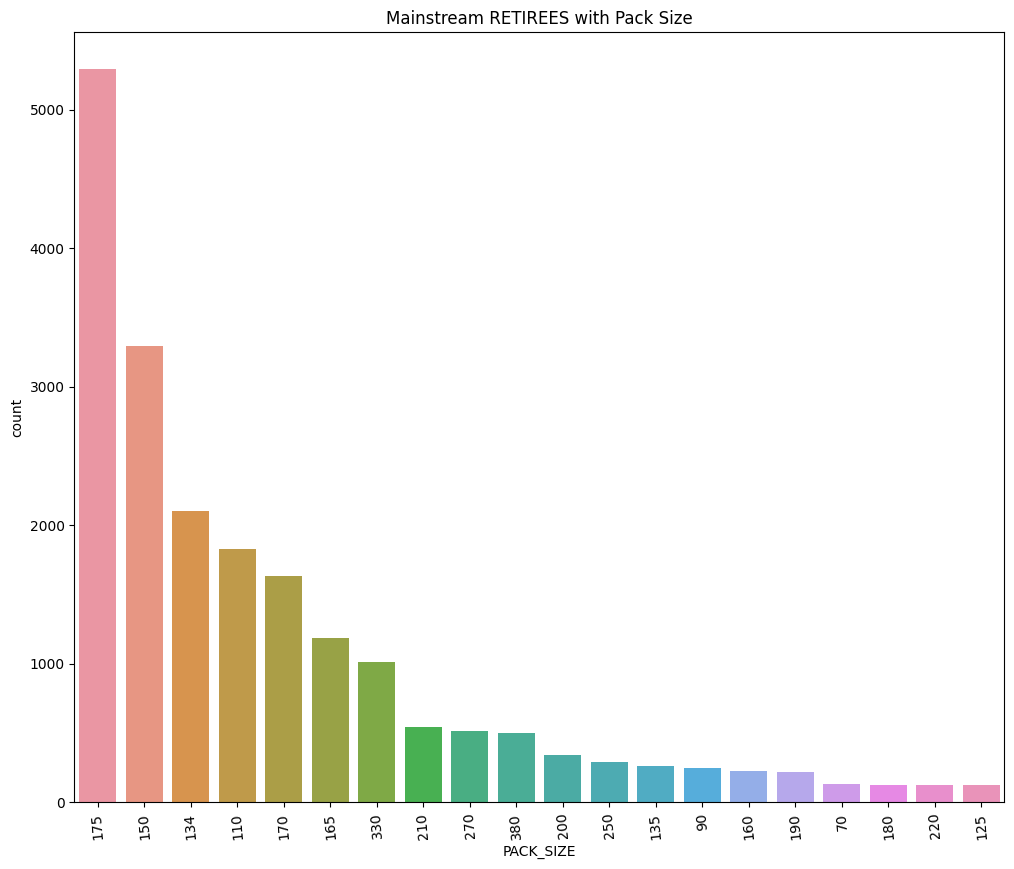

In [80]:
sns_count_plot(mainstreamRetireesData,'PACK_SIZE',title='Mainstream RETIREES with Pack Size')

insights:



1.   most preffered pack size for Mainstream YOUNG SINGLES/COUPLES, Mainstream Retirees, and Budget Old Families is 175g




#### Brand

##### Mainstream YOUNG SINGLES/COUPLES and preferred Brand





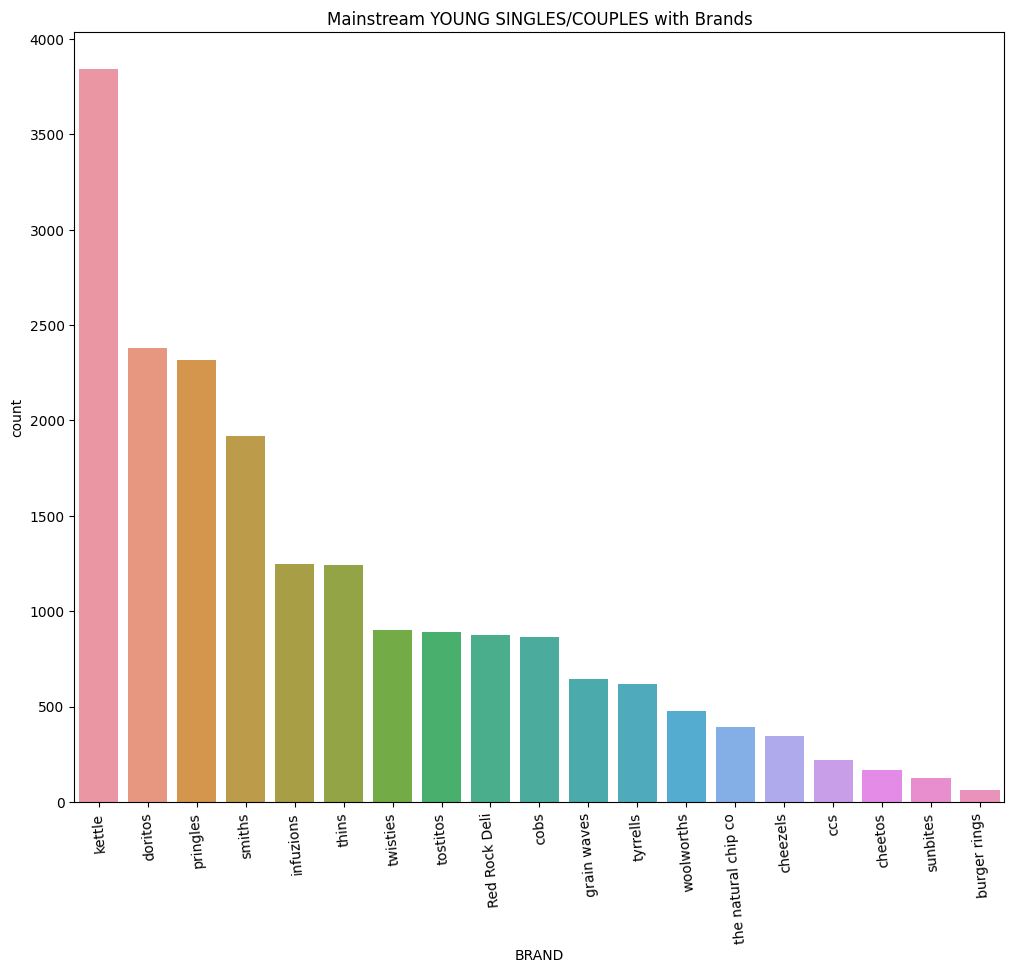

In [81]:
sns_count_plot(mainstreamYngData,'BRAND',title='Mainstream YOUNG SINGLES/COUPLES with Brands')

##### Budget Old Families and preferred Brand


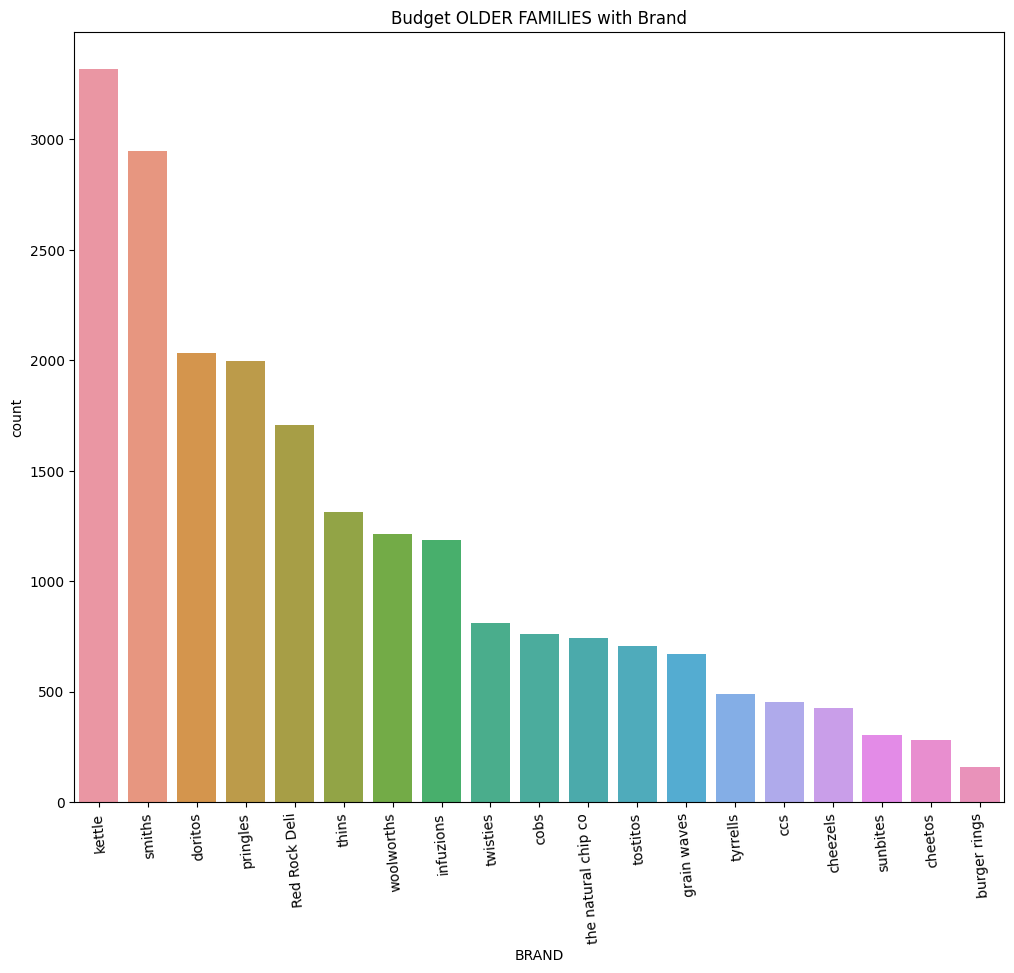

In [82]:
sns_count_plot(BudgetOldFamData,'BRAND',title='Budget OLDER FAMILIES with Brand')

##### Mainstream Retirees and preferred Brand


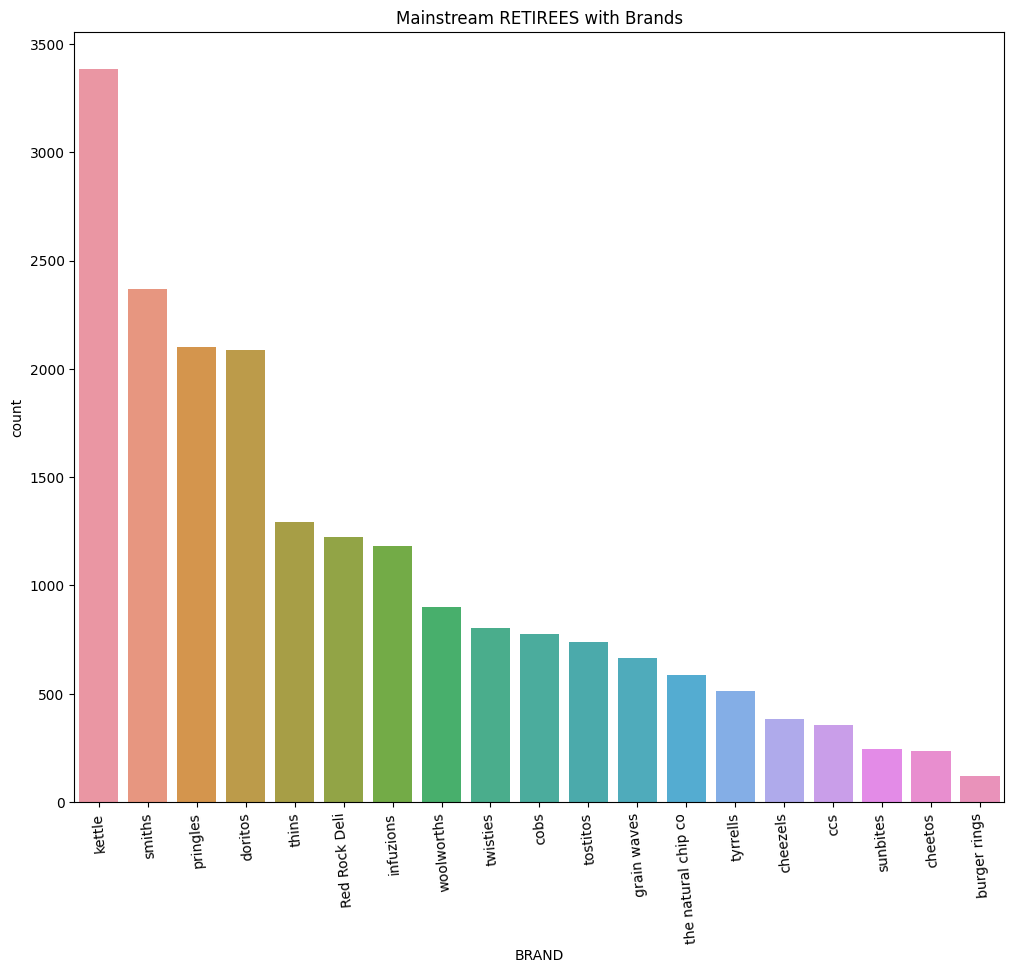

In [83]:
sns_count_plot(mainstreamRetireesData,'BRAND',title='Mainstream RETIREES with Brands')

insights:



1.   most preffered Brand for Mainstream YOUNG SINGLES/COUPLES, Mainstream Retirees, and Budget Old Families is kettle




### Brands with the highest unit price

<Axes: title={'center': 'Brand with the highest unit price'}, xlabel='BRAND', ylabel='price'>

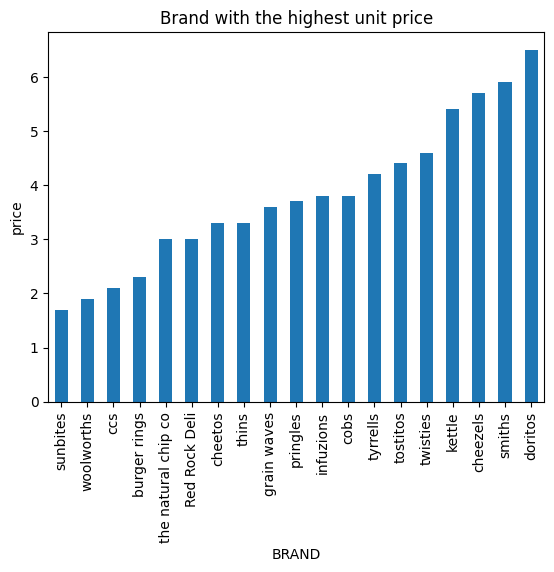

In [84]:
plt.title('Brand with the highest unit price')
plt.ylabel("price")
data.groupby('BRAND')['UNIT_PRICE'].max().sort_values().plot(kind='bar')

### Price Range investigation

#### Mainstream and their prices ranges rate




In [85]:
mainstreamData=data[(data['PREMIUM_CUSTOMER']=='Mainstream')]

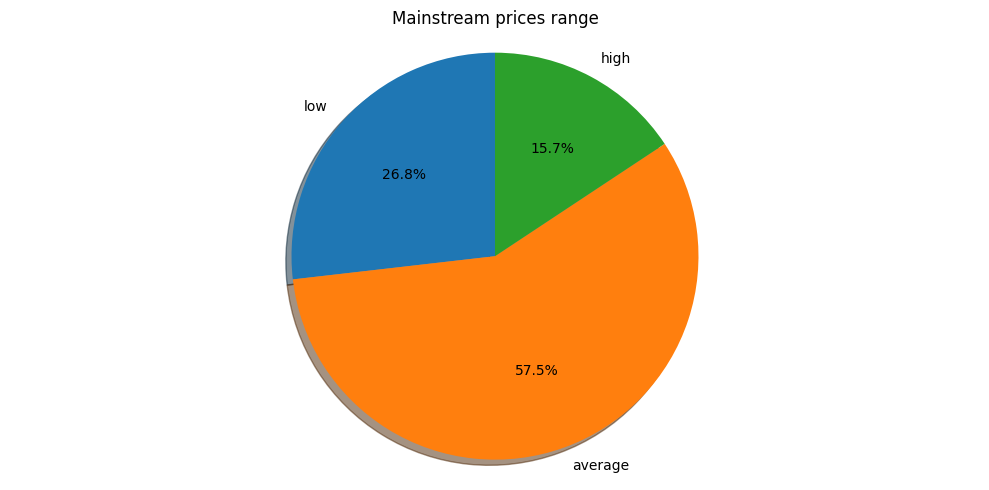

In [86]:
pie_plot(mainstreamData,'PRICE_RANGE','Mainstream prices range')

insights:
1. mainstream represents 40% of our customers
2. 15.7% of mainstream customers have potential to buy expensive chips
3. our target is to get the 57.5% (who pays average prices) to buy high prices products

recommendations:


*   Marketing campaign for the 57.5% of mainstream on the high prices products




#### on Budget and their prices ranges rate


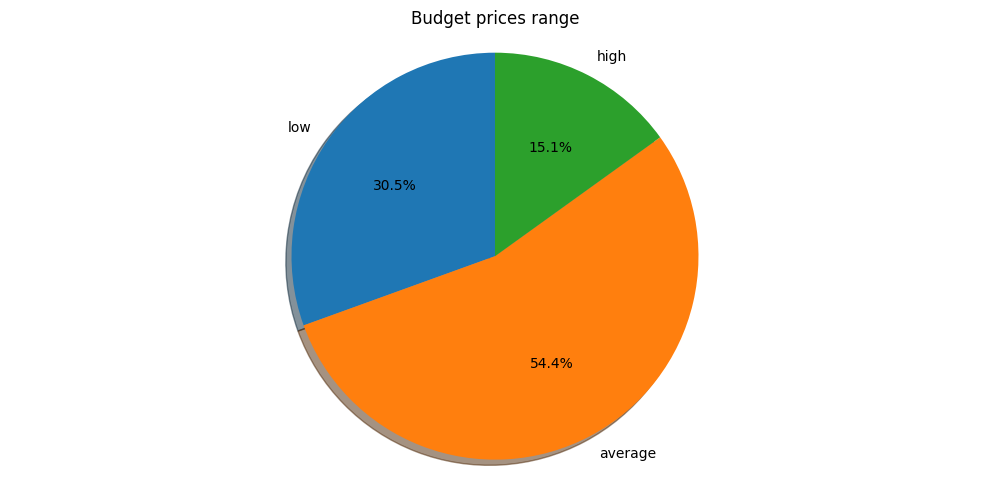

In [87]:
pie_plot(data[(data['PREMIUM_CUSTOMER']=='Budget')],'PRICE_RANGE','Budget prices range')

#### Premium and their prices ranges rate


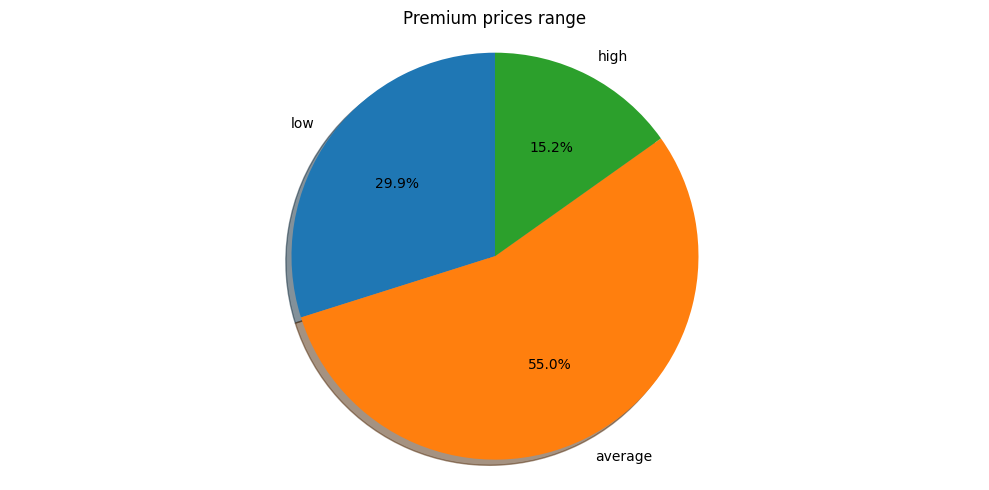

In [88]:
pie_plot(data[(data['PREMIUM_CUSTOMER']=='Premium')],'PRICE_RANGE','Premium prices range')

### Stores Analysis

In [89]:
#getting sales for each store
storesSales=pd.DataFrame(data.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False))

In [90]:
storesSales.describe()

,TOT_SALES
count,271.000000
mean,6661.150185
std,4391.311405
min,6.000000
25%,2755.925000
50%,5663.500000
75%,10246.225000
max,16544.650000


####  Stores with the highest Total Sales

Text(0.5, 0, 'store number')

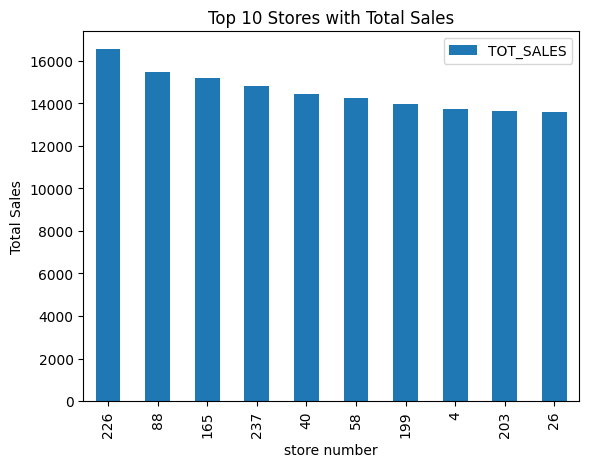

In [91]:
storesSales[:10].plot(kind='bar',title='Top 10 Stores with Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('store number')

####  Stores with the least Total Sales

Text(0.5, 0, 'store number')

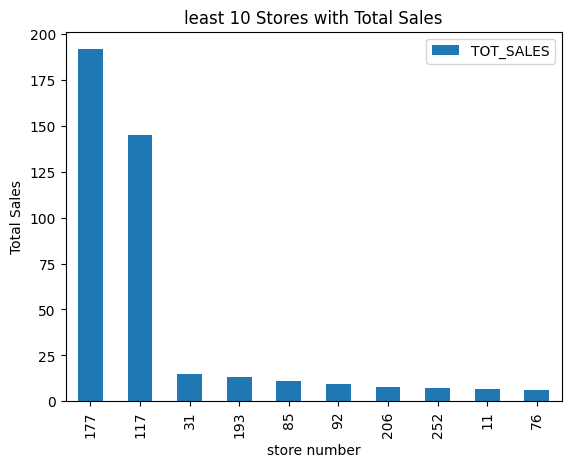

In [92]:

storesSales.tail(10).plot(kind='bar',title='least 10 Stores with Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('store number')

In [93]:
storesSales.shape

(271, 1)

In [94]:
#getting stores with total sales less than average
storesSalesDown=storesSales[storesSales['TOT_SALES']<storesSales['TOT_SALES'].mean()]

In [95]:
storesSalesDown.shape

(136, 1)

In [96]:
#getting start date for every store
storesSalesDown['START_DATE']=data[data['STORE_NBR'].isin(storesSalesDown.index)].groupby('STORE_NBR')['DATE'].min()

In [97]:
#getting start and end date of our data
startDate=data['DATE'].min()
endDate=data['DATE'].max()

In [98]:
storesSalesDown=storesSalesDown.reset_index()

In [99]:
# start date for each low sales store transactions
storesSalesDown.groupby('START_DATE')['STORE_NBR'].count()

START_DATE
2018-07-01    81
2018-07-02    18
2018-07-03     9
2018-07-04     5
2018-07-05     2
2018-07-06     2
2018-07-07     3
2018-07-08     1
2018-07-10     3
2018-07-11     1
2018-07-12     1
2018-07-15     1
2018-07-17     1
2018-07-30     1
2018-08-08     2
2018-09-01     1
2018-10-21     1
2018-10-22     1
2019-01-10     1
2019-03-02     1
Freq: D, Name: STORE_NBR, dtype: int64

In [100]:
print('start date in data is: ',startDate)
print('end date in data is: ',endDate)

start date in data is:  2018-07-01
end date in data is:  2019-06-30


#### low sales stores with their start date

Text(0.5, 0, 'start date')

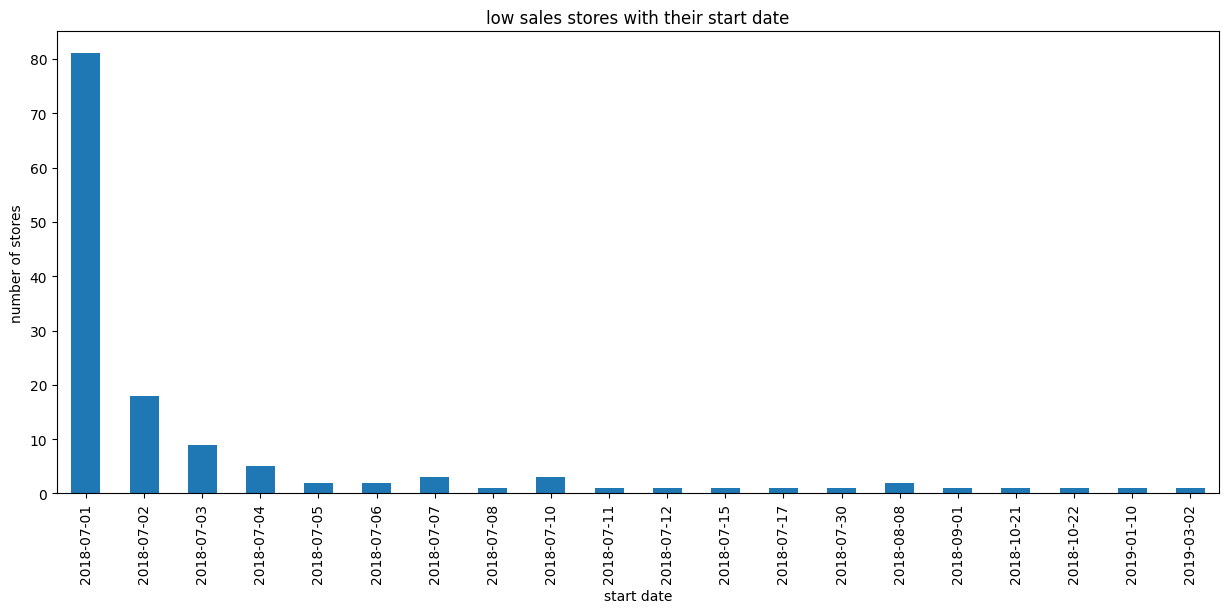

In [101]:
plt.figure(figsize=(15,6))
plt.title('low sales stores with their start date')
plt.ylabel("number of stores")
storesSalesDown.groupby('START_DATE')['STORE_NBR'].count().plot(kind='bar')
plt.xlabel("start date")


insights:


*  there're 136 out of 271 with total sales less than average
*  only 2 of them have a late start date (2019-01-10 and 2019-03-02)

recommendations:


*   require more data about stores with low sales to check their location (are they far away or in an depopulated area), their products availability and their management and marketing techniques

*   ask for data about marketing techniques for stores with high sales to help in increasing sales for others stores



*****


# Brand Recommendation using Association Rules




In [102]:
def brand_recommendations(df,customerBehavior):
  '''
  function to recommend the next most likely brand to be purchased by cutomers with a specific behavior based
  on the purchase history of customers with the same behavior

  Args:
      df{dataframe}: representing the transactions with customers data

  Returns:
      rules{dataframe}: association rules for brands that are frequently bought by the same customers in a specific group

  '''

  basket =(df[(df['PREMIUM_CUSTOMER']==customerBehavior)]
  .groupby(['LYLTY_CARD_NBR','BRAND'])['PROD_QTY']
  .sum().unstack().reset_index().fillna(0)
  .set_index('LYLTY_CARD_NBR'))


  #one hot encoding
  basket=basket.applymap(hot_encode)


  #apply apriori algorithm to get frequent bought brands
  frqBrands=apriori(basket,min_support=0.07,use_colnames=True)

  rules=association_rules(frqBrands,metric='lift',min_threshold=1)
  rules=rules.sort_values(['confidence','lift'],ascending=[False,False])

  return rules


## Brand Recommendation for Mainstream customers




In [103]:
rulesMainstream=brand_recommendations(data,'Mainstream')
rulesMainstream.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Red Rock Deli),(smiths),0.162838,0.296374,0.079801,0.490062,1.653528,0.031540,1.379827,0.472110
14,(thins),(kettle),0.184485,0.425211,0.085091,0.461234,1.084718,0.006646,1.066862,0.095770
2,(doritos),(kettle),0.291188,0.425211,0.132839,0.456197,1.072873,0.009023,1.056981,0.095827
11,(pringles),(kettle),0.287325,0.425211,0.130264,0.453367,1.066218,0.008090,1.051509,0.087145
8,(infuzions),(kettle),0.172548,0.425211,0.077608,0.449778,1.057777,0.004239,1.044650,0.066012


insights:


*   if a mainstream customer purchase a (Red Rock Deli) product, s/he's likely to purchase from (smiths) products with a confidence of 0.49
*   if a mainstream customer purchase from (thins, doritos, pringles, or infuzions) products, s/he's likely to purchase from (kettle) products



## Brand Recommendation for on Budget customers




In [104]:
rulesBudget=brand_recommendations(data,'Budget')
rulesBudget.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Red Rock Deli),(smiths),0.194410,0.330876,0.098975,0.509106,1.538664,0.034650,1.363074,0.434570
20,(woolworths),(smiths),0.154836,0.330876,0.078272,0.505515,1.527810,0.027041,1.353175,0.408759
8,(infuzions),(kettle),0.182079,0.425477,0.089603,0.492107,1.156601,0.012132,1.131189,0.165539
2,(doritos),(kettle),0.294676,0.425477,0.144006,0.488691,1.148572,0.018628,1.123632,0.183396
14,(thins),(kettle),0.199658,0.425477,0.096351,0.482579,1.134207,0.011401,1.110358,0.147845


insights:


*   if an on Budget customer purchase from (Red Rock Deli or woolworths) products, s/he's likely to purchase from (smiths) products with a confidence of 0.50
*   if an on Budget customer purchase from (infuzions, doritos, or thins) products, s/he's likely to purchase from (kettle) products


## Brand Recommendation for Premium customers




In [105]:
rulesPremium=brand_recommendations(data,'Premium')
rulesPremium.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Red Rock Deli),(smiths),0.188332,0.322909,0.095379,0.506441,1.568370,0.034565,1.371855,0.446483
18,(woolworths),(smiths),0.147032,0.322909,0.072357,0.492116,1.524006,0.024879,1.333160,0.403104
11,(pringles),(kettle),0.289481,0.417534,0.136141,0.470292,1.126358,0.015273,1.099599,0.157888
2,(doritos),(kettle),0.283819,0.417534,0.132151,0.465616,1.115156,0.013647,1.089976,0.144188
8,(infuzions),(kettle),0.178519,0.417534,0.082817,0.463908,1.111067,0.008279,1.086504,0.121688


insights:


*   if a premium customer purchase from (Red Rock Deli or woolworths) products, s/he's likely to purchase from (smiths) products with a confidence of 0.50 and 0.49
*   if a premium customer purchase from (pringles, , doritos, or infuzions) products, s/he's likely to purchase from (kettle) products
****
